<a href="https://colab.research.google.com/github/NAGARAJVODNALA/AIFINALPROJECT/blob/main/AIPROJECTWITHSHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract :**
Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.

**Attribute Information :**
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve.

**These are summarised below:**

Mean of the integrated profile.
Standard deviation of the integrated profile.
Excess kurtosis of the integrated profile.
Skewness of the integrated profile.
Mean of the DM-SNR curve.
Standard deviation of the DM-SNR curve.
Excess kurtosis of the DM-SNR curve.
Skewness of the DM-SNR curve.
Class

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout


**PHASE 1 --------- A,B,C,D,E,F,G,H,I,J,K**

The dataset HTRU_2_AIDATASET has 17898 rows and 9 columns.

Missing values in each column:
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated

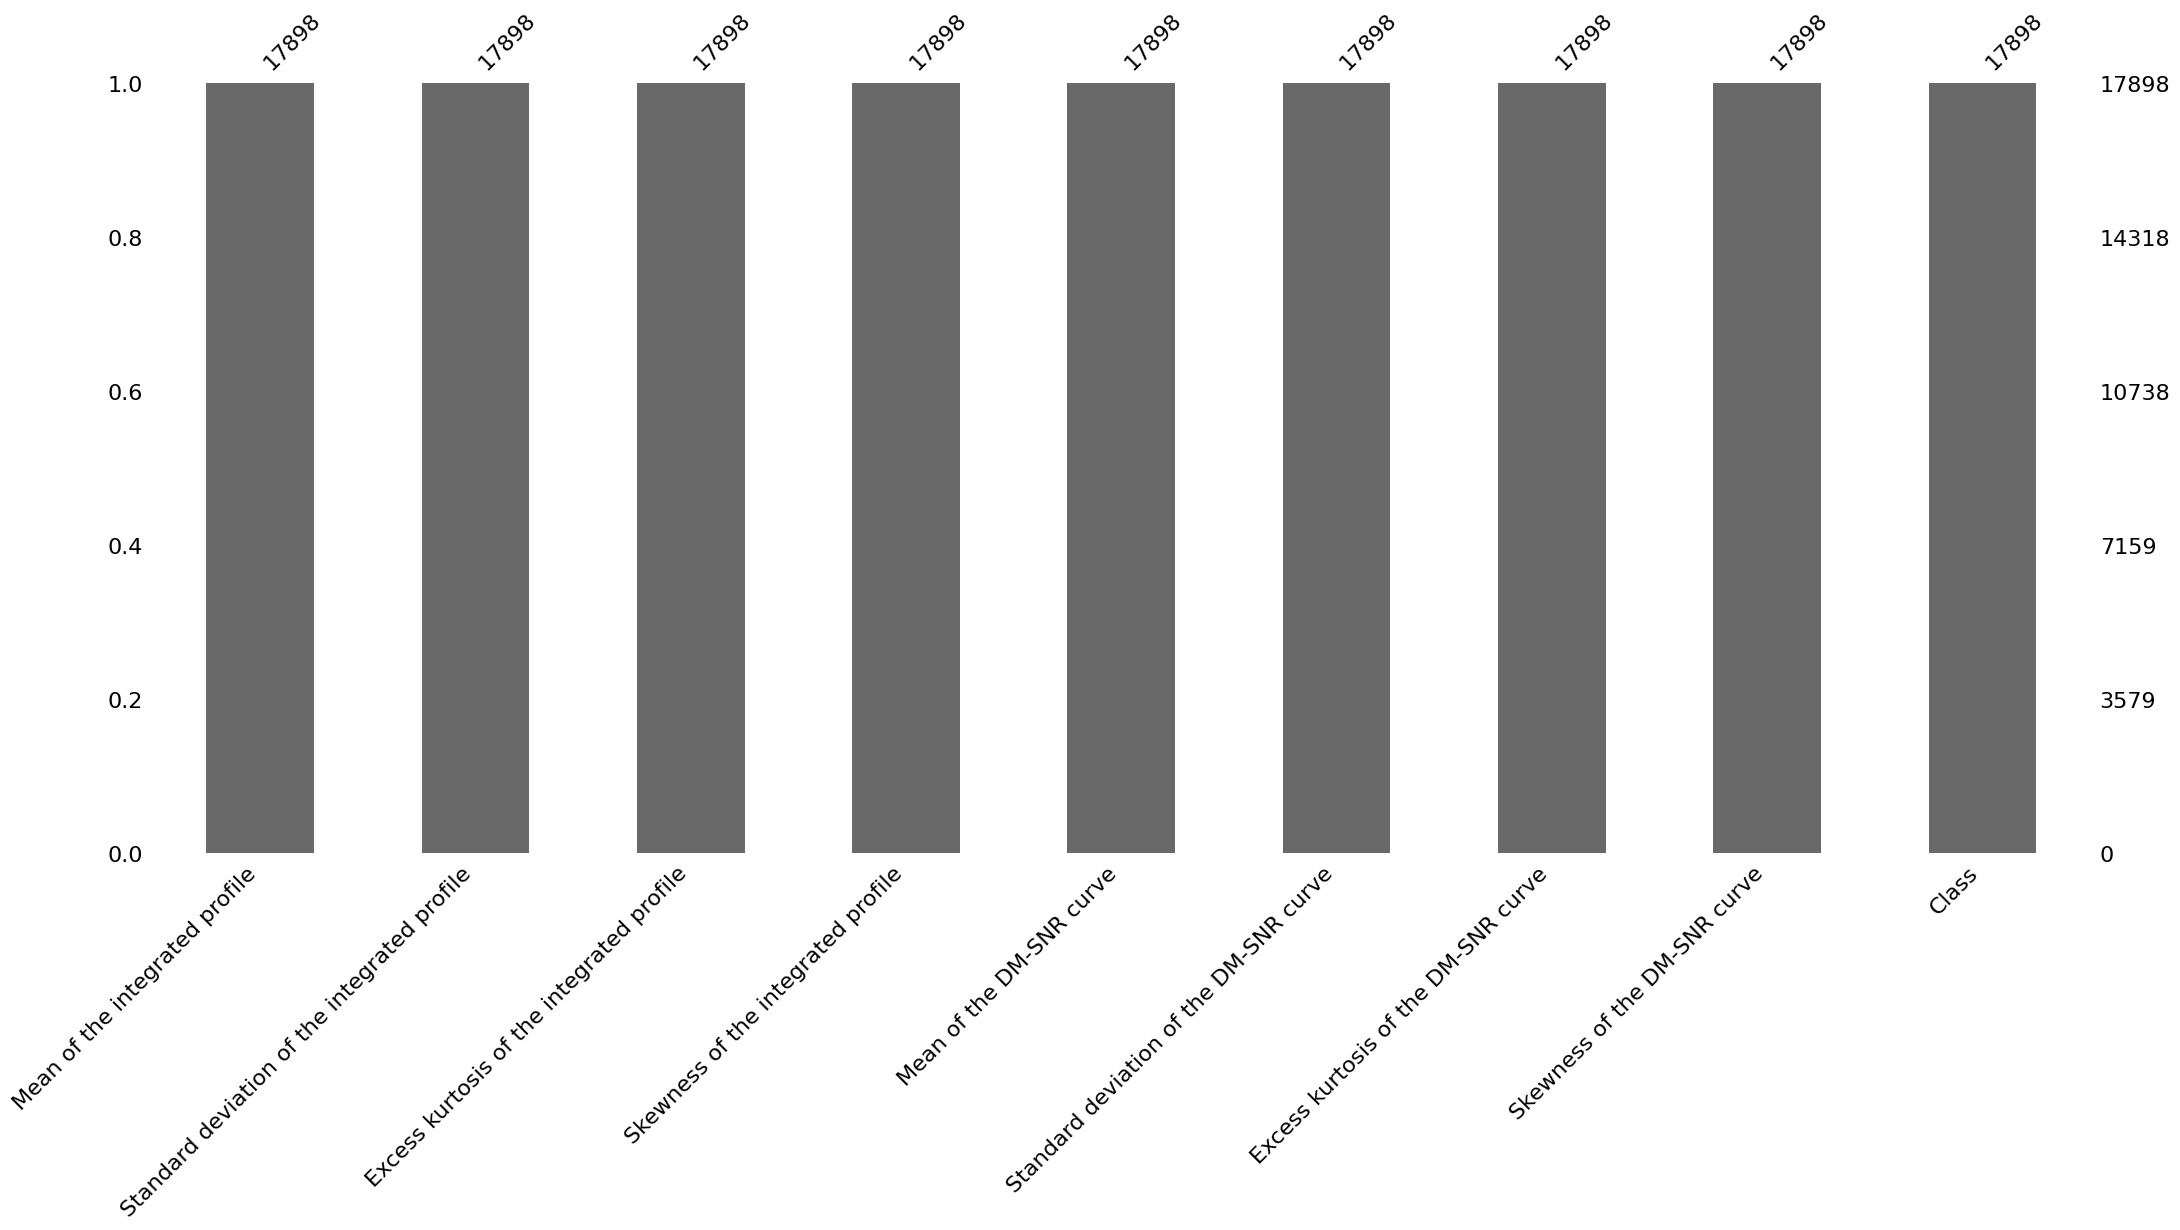

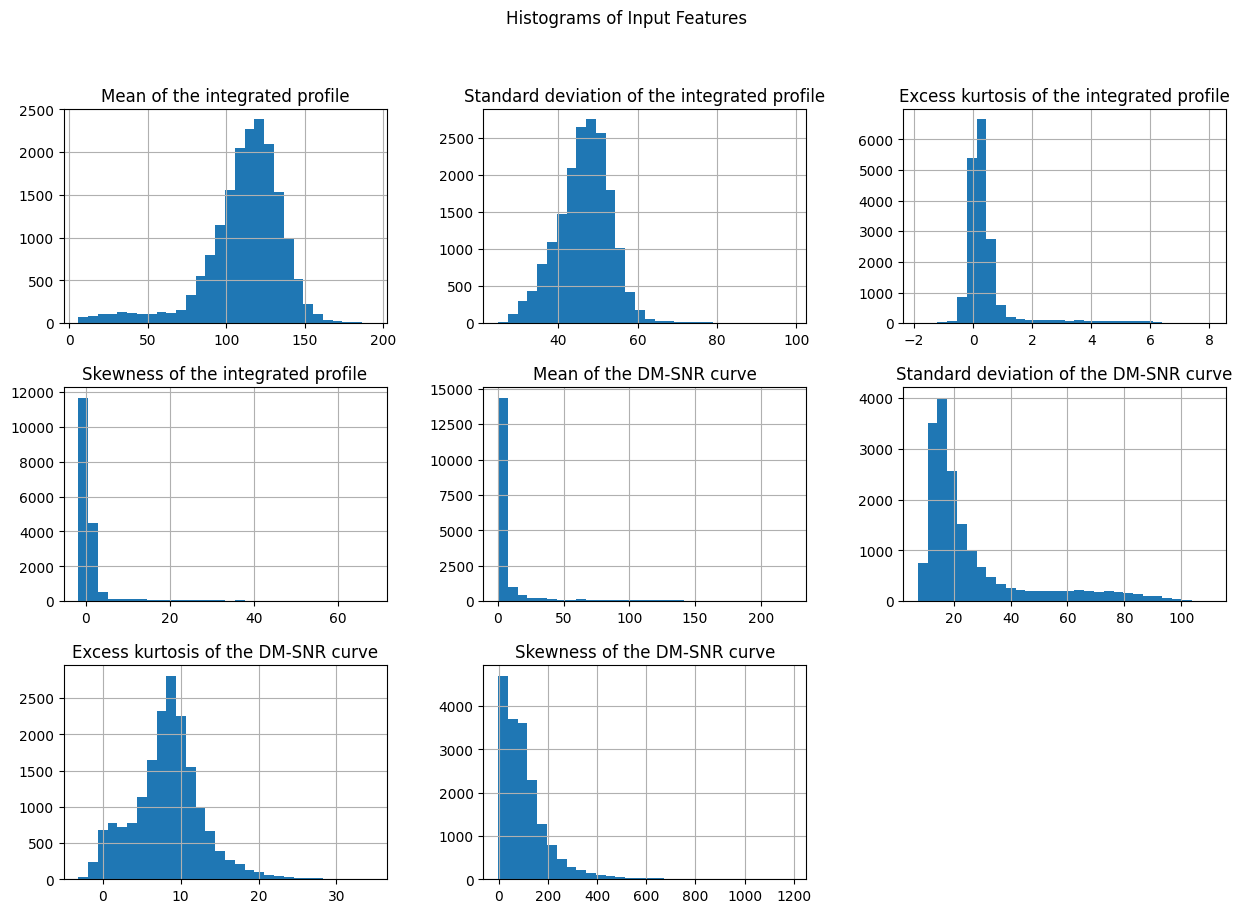

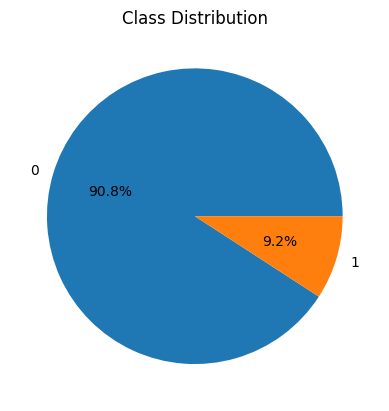

In [43]:
# PHASE 1
# A) Load the dataset
data = pd.read_csv('HTRU_2_AIDATASET.csv')


# B) Show number of rows and columns
print(f"The dataset HTRU_2_AIDATASET has {data.shape[0]} rows and {data.shape[1]} columns.")

# C)-----Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# D)Shows first five rows of the dataset
data.head()

# E)Let's obtain a brief overview of the dataframe
data.info()

# F)Shows number of rows in each column with bar diagram
msno.bar(data)

# G) Distribute each column , split the input features and output parameters
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# H)Show distribution of each column
#----- Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

# I)Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

# J)Unique values of the dtatset
data.nunique()


# K) Normalize the data
#X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

data_normalized = (data.iloc[:, :-1] - data.iloc[:, :-1].min()) / (data.iloc[:, :-1].max() - data.iloc[:, :-1].min())
data_normalized['Class'] = data.iloc[:, -1]

.....................................................................................  **PHASE 2** ................**L,M,N,O,P,Q**..............................................................................................

In [44]:
# PHASE 2

# L)NOW BUILD A MODEL WITH SINGLE LAYER AND SINGLE NEURON

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# M)Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# N)Print the accuracy
_, accuracy_single_layer = single_layer_model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))



# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS
# PART 2: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(16, activation='relu', input_dim=8))
multi_layer_model.add(Dense(8, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))


Epoch 1/10
560/560 [==============================] - 1s 1ms/step - loss: 25.2329 - accuracy: 0.5225
Epoch 2/10
560/560 [==============================] - 1s 1ms/step - loss: 3.3787 - accuracy: 0.8899
Epoch 3/10
560/560 [==============================] - 1s 1ms/step - loss: 0.6241 - accuracy: 0.9447
Epoch 4/10
560/560 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.9494
Epoch 5/10
560/560 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.9506
Epoch 6/10
560/560 [==============================] - 1s 1ms/step - loss: 0.2963 - accuracy: 0.9523
Epoch 7/10
560/560 [==============================] - 1s 1ms/step - loss: 0.2556 - accuracy: 0.9551
Epoch 8/10
560/560 [==============================] - 1s 1ms/step - loss: 0.2194 - accuracy: 0.9592
Epoch 9/10
560/560 [==============================] - 1s 1ms/step - loss: 0.1894 - accuracy: 0.9622
Epoch 10/10
560/560 [==============================] - 1s 1ms/step - loss: 0.1634 - accuracy: 0.964

In [ ]:
'''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 2
# PART 3: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(64, activation='relu', input_dim=8))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(16, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))



In [ ]:
''''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 3
# PART 4: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(128, activation='relu', input_dim=8))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(16, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))

multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




In [ ]:
"""# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 4
# PART 5: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model.add(Dense(128, activation='relu'))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))
"""



In [ ]:
'''# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 4 BUT WITH DROPOUT FEATURE ADDED
# PART 5: Multilayer model with more layers and more neurons

multi_layer_model = Sequential()
multi_layer_model.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(128, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(64, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(32, activation='relu'))
multi_layer_model.add(Dropout(0.5))
multi_layer_model.add(Dense(1, activation='sigmoid'))

multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=200, batch_size=32, verbose=1)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))'''




..................................................................................................  **PHASE 3**  ...........................................................................................................................

In [ ]:
'''# PHASE 3


# R) Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]


# S) Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]

# T) Plotting, graphs, visualization
# Train model with checkpointing
# Use multi_layer_model instead of model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
history = multi_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint])


# U)Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# V) Gradually grow model (Not necessary as this example model achieves good accuracy)

# W) Print accuracy and loss on both training and validation dataset
_, train_accuracy = multi_layer_model.evaluate(X_train, y_train, verbose=1)
_, val_accuracy = multi_layer_model.evaluate(X_val, y_val, verbose=1)
print('Training Accuracy: %.2f' % (train_accuracy * 100))
print('Validation Accuracy: %.2f' % (val_accuracy * 100))

# X) Print recall, precision, F1-score
y_val_pred = (multi_layer_model.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1_score)



Epoch 1/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9761 - val_loss: 0.0776 - val_accuracy: 0.9754
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9755 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9763 - val_loss: 0.0830 - val_accuracy: 0.9754
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9754 - val_loss: 0.0831 - val_accuracy: 0.9732
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9761 - val_loss: 0.0790 - val_accuracy: 0.9757
Epoch 6/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.9754 - val_loss: 0.0771 - val_accuracy: 0.9763
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9767 - val_loss: 0.0778 - val_accuracy: 0.9760
Epoch 

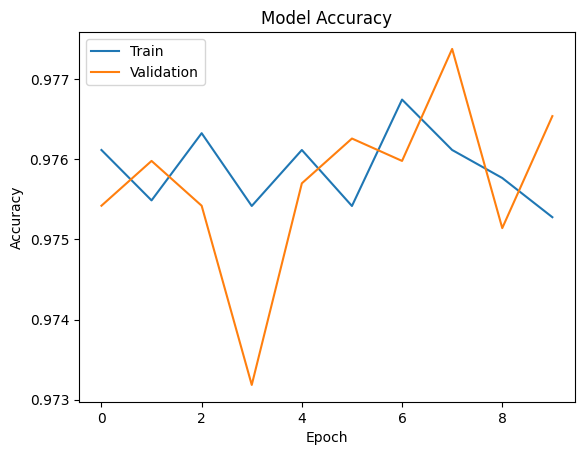

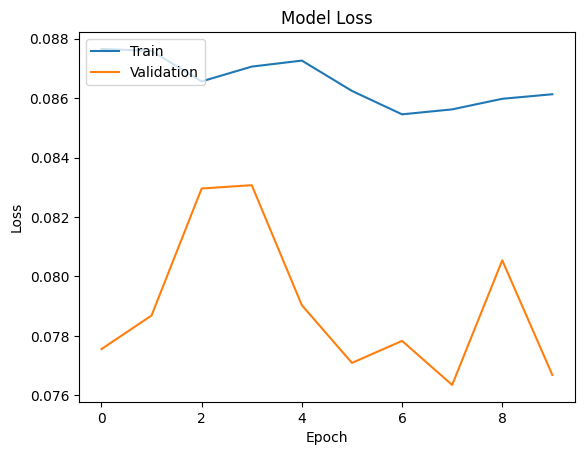

112/112 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9765
Training Accuracy: 97.64
Validation Accuracy: 97.65
112/112 [==============================] - 0s 957us/step
Recall: 0.80
Precision: 0.94
F1 Score: 0.86


In [45]:
# PHASE 3

# R) Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

# S) Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]

# T) Plotting, graphs, visualization
# Train model with checkpointing
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
history = multi_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint])

# U)Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# V) Gradually grow model (Not necessary as this example model achieves good accuracy)

# W) Print accuracy and loss on both training and validation dataset
_, train_accuracy = multi_layer_model.evaluate(X_train, y_train, verbose=1)
_, val_accuracy = multi_layer_model.evaluate(X_val, y_val, verbose=1)
print('Training Accuracy: %.2f' % (train_accuracy * 100))
print('Validation Accuracy: %.2f' % (val_accuracy * 100))

# X) Print recall, precision, F1-score
y_val_pred = (multi_layer_model.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1_score)


......................... **PHASE 4** ...............................

In [ ]:
''' NORMAL FEATURE SELECTION
# PHASE 4

# N) Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)
    single_feature_model.fit(X_train_single, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=1)
    val_accuracies.append(single_feature_val_accuracy)


# Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.show()


# Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1)
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.show()




In [46]:
!pip install lime
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


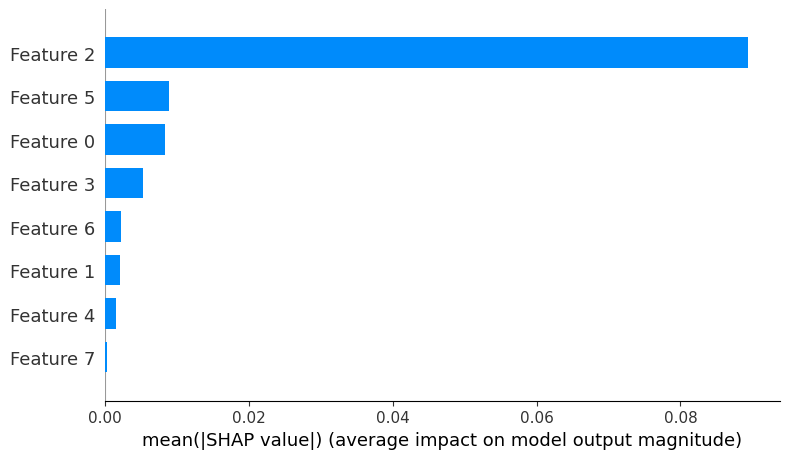

Epoch 1/10
448/448 [==============================] - 1s 1ms/step - loss: 0.7084 - accuracy: 0.9083
Epoch 2/10
448/448 [==============================] - 1s 1ms/step - loss: 0.5005 - accuracy: 0.9083
Epoch 3/10
448/448 [==============================] - 1s 1ms/step - loss: 0.3816 - accuracy: 0.9095
Epoch 4/10
448/448 [==============================] - 1s 1ms/step - loss: 0.2598 - accuracy: 0.9435
Epoch 5/10
448/448 [==============================] - 1s 1ms/step - loss: 0.1735 - accuracy: 0.9596
Epoch 6/10
448/448 [==============================] - 1s 1ms/step - loss: 0.1295 - accuracy: 0.9659
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9702
Epoch 8/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9725
Epoch 9/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9742
Epoch 10/10
112/112 [==============================] - 0s 909us/step - loss: 0.0809 - accuracy: 0.97

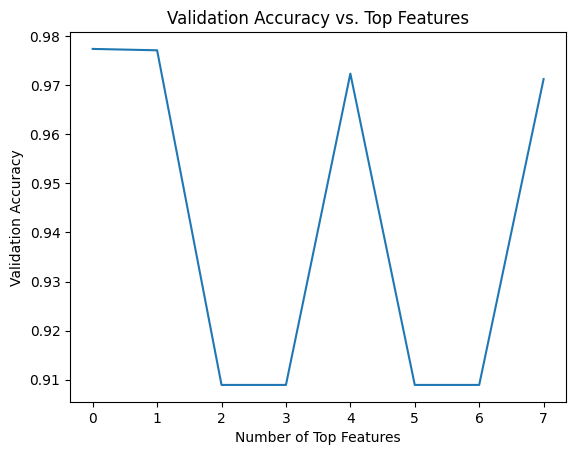

In [47]:
# PHASE 4
# FEATURE SELECTION USING SHAP

import shap

# N) Feature importance using SHAP values
# Train an XGBoost model
import xgboost
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Plot the SHAP values for each feature
shap.summary_plot(shap_values, X_train, plot_type="bar")

# O) Remove unimportant features and compare
num_features = X_train.shape[1]
sorted_indices = np.argsort(np.abs(shap_values.values).mean(0))[::-1]
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i+1]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i+1))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=1)

    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=1)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Top Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Top Features')
plt.show()
